In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
sns.set_theme(font='SimHei', font_scale=0.8) # 设置字体大小比例


In [46]:
data = pd.read_excel('基金数据.xlsx', skiprows=1, parse_dates=['日期'], index_col='日期')
data

,纳斯达克ETF,红利低波ETF,黄金ETF
日期,,,
2020-11-05,1.013,0.660,3.965
2020-11-06,1.005,0.663,4.001
2020-11-09,1.030,0.673,3.990
2020-11-10,0.995,0.673,3.889
2020-11-11,0.983,0.677,3.881
...,...,...,...
2025-04-14,1.797,1.095,7.327
2025-04-15,1.773,1.106,7.325
2025-04-16,1.730,1.116,7.503


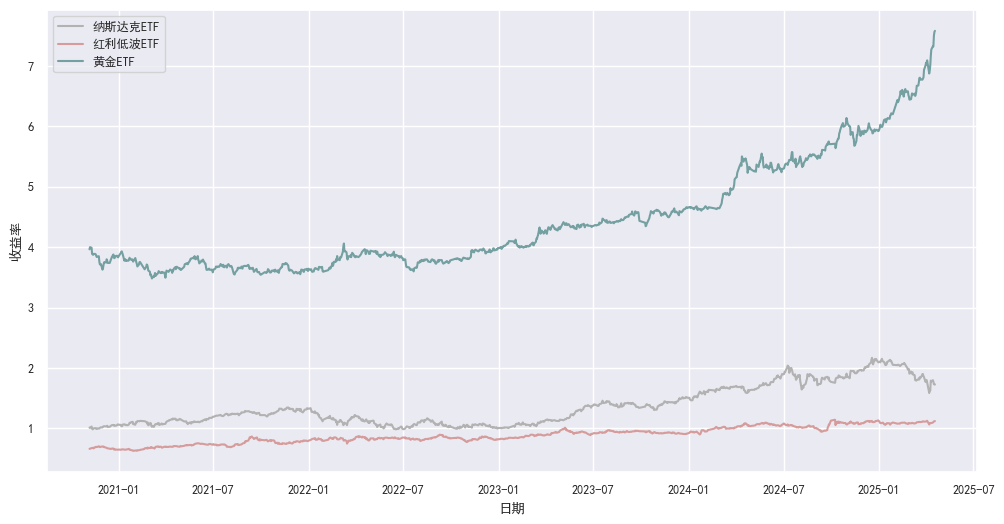

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.iloc[:, 0], label='纳斯达克ETF', color='#B2B2B2')
plt.plot(data.index, data.iloc[:, 1], label='红利低波ETF', color='#D69C9B')
plt.plot(data.index, data.iloc[:, 2], label='黄金ETF', color='#74A0A1')
plt.xlabel('日期')
plt.ylabel('收益率')
plt.legend(loc='upper left')
plt.show()

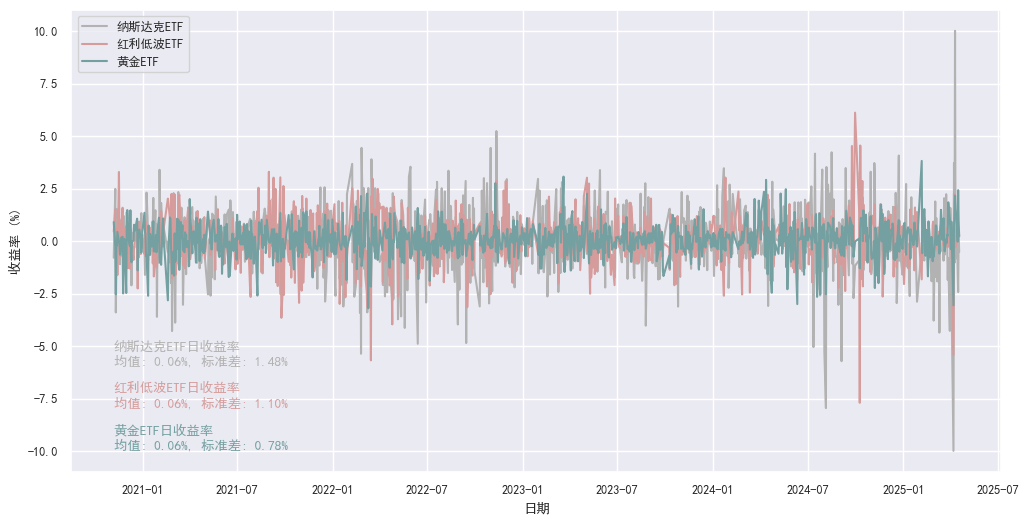

In [48]:
nasdaq_pct = data.iloc[:, 0].pct_change().dropna() * 100
dividend_pct = data.iloc[:, 1].pct_change().dropna() * 100
gold_pct = data.iloc[:, 2].pct_change().dropna() * 100

# 计算每个资产的均值和标准差
nasdaq_mean = nasdaq_pct.mean()
nasdaq_std = nasdaq_pct.std()

dividend_mean = dividend_pct.mean()
dividend_std = dividend_pct.std()

gold_mean = gold_pct.mean()
gold_std = gold_pct.std()

# 创建图表
plt.figure(figsize=(12, 6))
plt.plot(data.index[1:], nasdaq_pct, label='纳斯达克ETF', color='#B2B2B2')
plt.plot(data.index[1:], dividend_pct, label='红利低波ETF', color='#D69C9B')
plt.plot(data.index[1:], gold_pct, label='黄金ETF', color='#74A0A1')

# 添加文本注释显示均值和标准差
plt.text(data.index[1], -6, f'纳斯达克ETF日收益率\n均值: {nasdaq_mean:.2f}%, 标准差: {nasdaq_std:.2f}%', 
         color='#B2B2B2', verticalalignment='bottom')
plt.text(data.index[1], -8, f'红利低波ETF日收益率\n均值: {dividend_mean:.2f}%, 标准差: {dividend_std:.2f}%', 
         color='#D69C9B', verticalalignment='bottom')
plt.text(data.index[1], -10, f'黄金ETF日收益率\n均值: {gold_mean:.2f}%, 标准差: {gold_std:.2f}%', 
         color='#74A0A1', verticalalignment='bottom')

# 添加标签和图例
plt.xlabel('日期')
plt.ylabel('收益率 (%)')
plt.legend(loc='upper left')

# 显示图表
plt.show()


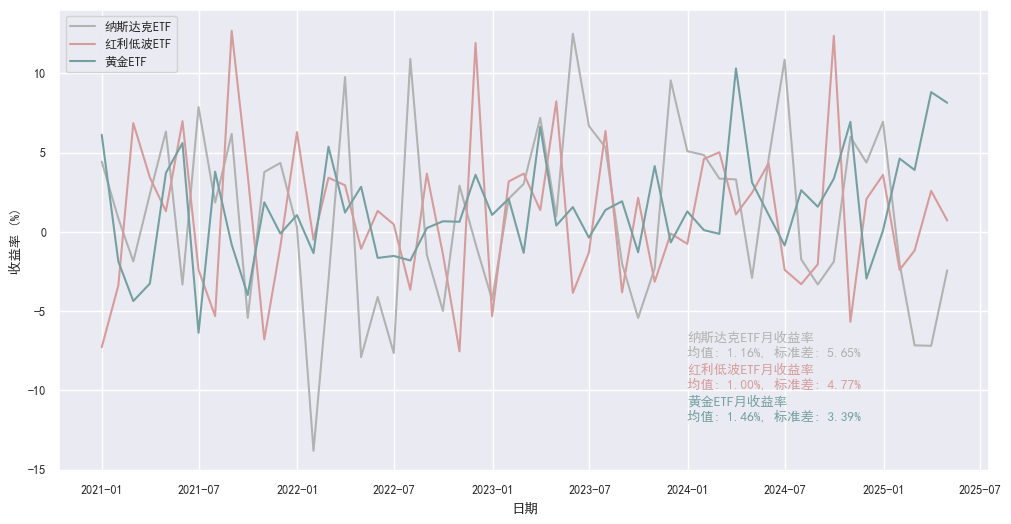

In [49]:
# 按月重新采样并计算百分比变化
nasdaq_pct_monthly = data.iloc[:, 0].resample('ME').ffill().pct_change().dropna() * 100
dividend_pct_monthly = data.iloc[:, 1].resample('ME').ffill().pct_change().dropna() * 100
gold_pct_monthly = data.iloc[:, 2].resample('ME').ffill().pct_change().dropna() * 100

# 计算每个资产的月收益率均值和标准差
nasdaq_mean_monthly = nasdaq_pct_monthly.mean()
nasdaq_std_monthly = nasdaq_pct_monthly.std()

dividend_mean_monthly = dividend_pct_monthly.mean()
dividend_std_monthly = dividend_pct_monthly.std()

gold_mean_monthly = gold_pct_monthly.mean()
gold_std_monthly = gold_pct_monthly.std()

# 创建图表
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_pct_monthly.index, nasdaq_pct_monthly, label='纳斯达克ETF', color='#B2B2B2')
plt.plot(dividend_pct_monthly.index, dividend_pct_monthly, label='红利低波ETF', color='#D69C9B')
plt.plot(gold_pct_monthly.index, gold_pct_monthly, label='黄金ETF', color='#74A0A1')

# 添加文本注释显示月收益率均值和标准差
plt.text(nasdaq_pct_monthly.index[36], -8, 
         f'纳斯达克ETF月收益率\n均值: {nasdaq_mean_monthly:.2f}%, 标准差: {nasdaq_std_monthly:.2f}%', 
         color='#B2B2B2', verticalalignment='bottom')
plt.text(dividend_pct_monthly.index[36], -10, 
         f'红利低波ETF月收益率\n均值: {dividend_mean_monthly:.2f}%, 标准差: {dividend_std_monthly:.2f}%', 
         color='#D69C9B', verticalalignment='bottom')
plt.text(gold_pct_monthly.index[36], -12, 
         f'黄金ETF月收益率\n均值: {gold_mean_monthly:.2f}%, 标准差: {gold_std_monthly:.2f}%', 
         color='#74A0A1', verticalalignment='bottom')

# 添加标签和图例
plt.xlabel('日期')
plt.ylabel('收益率 (%)')
plt.legend(loc='upper left')

# 显示图表
plt.show()

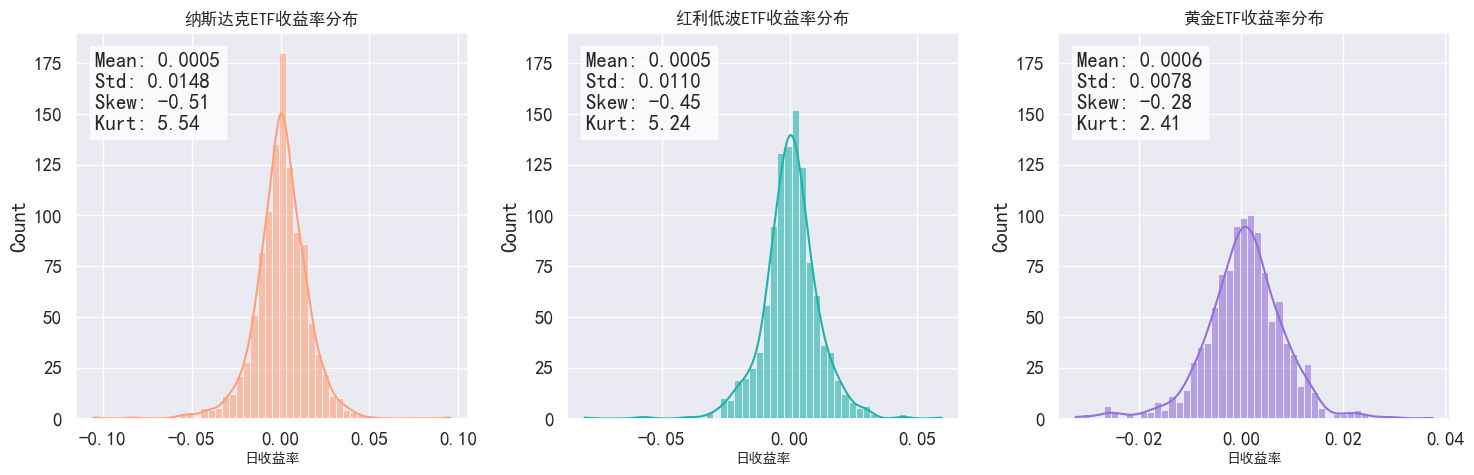

In [51]:

def plot_hist_kde(df):
    """
    绘制三只ETF的收益率分布直方图与核密度估计
    :param df: DataFrame, 列名为 ['黄金ETF', '红利低波ETF', '纳斯达克ETF'], 行为日期索引，值为价格
    """
    # 计算对数收益率
    returns = np.log(df / df.shift(1)).dropna()
    
    # 设置绘图风格
    sns.set_style("whitegrid")
    sns.set_theme(font='SimHei', font_scale=1.25)
    plt.figure(figsize=(15, 5))
    
    # 分三列绘制子图
    etfs = returns.columns
    colors = ['#FFA07A', '#20B2AA', '#9370DB']  # 黄金橙、蓝绿、纳斯达克紫
    
    for i, etf in enumerate(etfs):
        plt.subplot(1, 3, i+1)
        
        # 绘制直方图与KDE
        sns.histplot(returns[etf], bins=50, kde=True, color=colors[i], alpha=0.6)
        
        # 标注统计量
        mean = returns[etf].mean()
        std = returns[etf].std()
        skew = returns[etf].skew()
        kurt = returns[etf].kurtosis()
        text = f'Mean: {mean:.4f}\nStd: {std:.4f}\nSkew: {skew:.2f}\nKurt: {kurt:.2f}'
        
        plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, 
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
        
        plt.title(f'{etf}收益率分布', fontsize=12)
        plt.ylim(0, 190)
        plt.xlabel('日收益率', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('output/收益率分布.svg', dpi=300)
    plt.show()
plot_hist_kde(data)

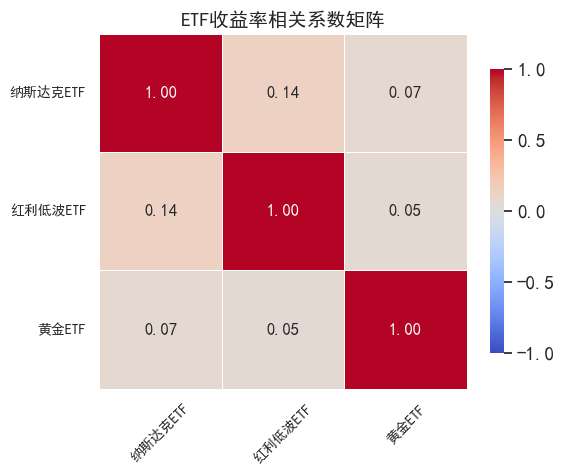

In [7]:
def plot_corr_heatmap(df):
    """
    绘制三只ETF收益率相关性热力图
    :param df: DataFrame, 列名为 ['黄金ETF', '红利低波ETF', '纳斯达克ETF'], 行为日期索引，值为价格
    """
    # 计算对数收益率与相关系数
    returns = np.log(df / df.shift(1)).dropna()
    corr_matrix = returns.corr()
    
    # 设置绘图风格
    sns.set_style("white")
    sns.set_theme(font='SimHei', font_scale=1.25)
    plt.figure(figsize=(6, 5))
    
    # 绘制热力图
    # mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # 隐藏上三角
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                vmin=-1, vmax=1, linewidths=0.5, 
                annot_kws={'size':12}, cbar_kws={'shrink':0.8})
    
    plt.title('ETF收益率相关系数矩阵', fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.savefig('output/ETF收益率相关系数矩阵.svg', dpi=300)
    plt.show()

# 调用示例
plot_corr_heatmap(data)

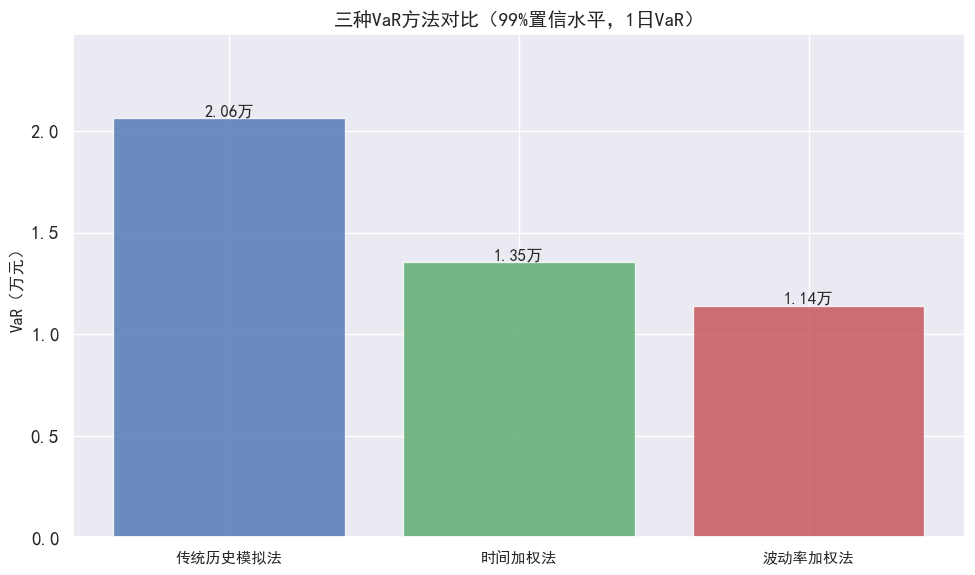

In [8]:
def plot_var_comparison(var_dict):
    """
    绘制三种VaR方法的对比柱状图
    :param var_dict: 字典，格式示例：
        {
            '传统历史模拟法': 4.2, 
            '时间加权法': 3.9,
            '波动率加权法': 3.8
        }
    """
    # 设置绘图风格
    sns.set_style("whitegrid")
    sns.set_theme(font='SimHei', font_scale=1.25)
    plt.figure(figsize=(10, 6))
    
    # 提取方法与VaR值
    methods = list(var_dict.keys())
    values = list(var_dict.values())
    colors = ['#4C72B0', '#55A868', '#C44E52']  # 传统-蓝，时间加权-绿，波动率加权-红
    
    # 绘制柱状图
    bars = plt.bar(methods, values, color=colors, alpha=0.8)
    
    # 标注数值
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                 f'{height:.2f}万', ha='center', va='bottom', fontsize=12)
    
    # 图表装饰
    plt.title('三种VaR方法对比（99%置信水平，1日VaR）', fontsize=14)
    plt.ylabel('VaR（万元）', fontsize=12)
    plt.xticks(fontsize=11)
    plt.ylim(0, max(values)*1.2)
    plt.tight_layout()
    plt.savefig('output/三种VaR方法对比.svg', dpi=300)
    plt.show()

# 调用示例
var_results = {'传统历史模拟法': 2.064, '时间加权法': 1.355, '波动率加权法': 1.14}
plot_var_comparison(var_results)

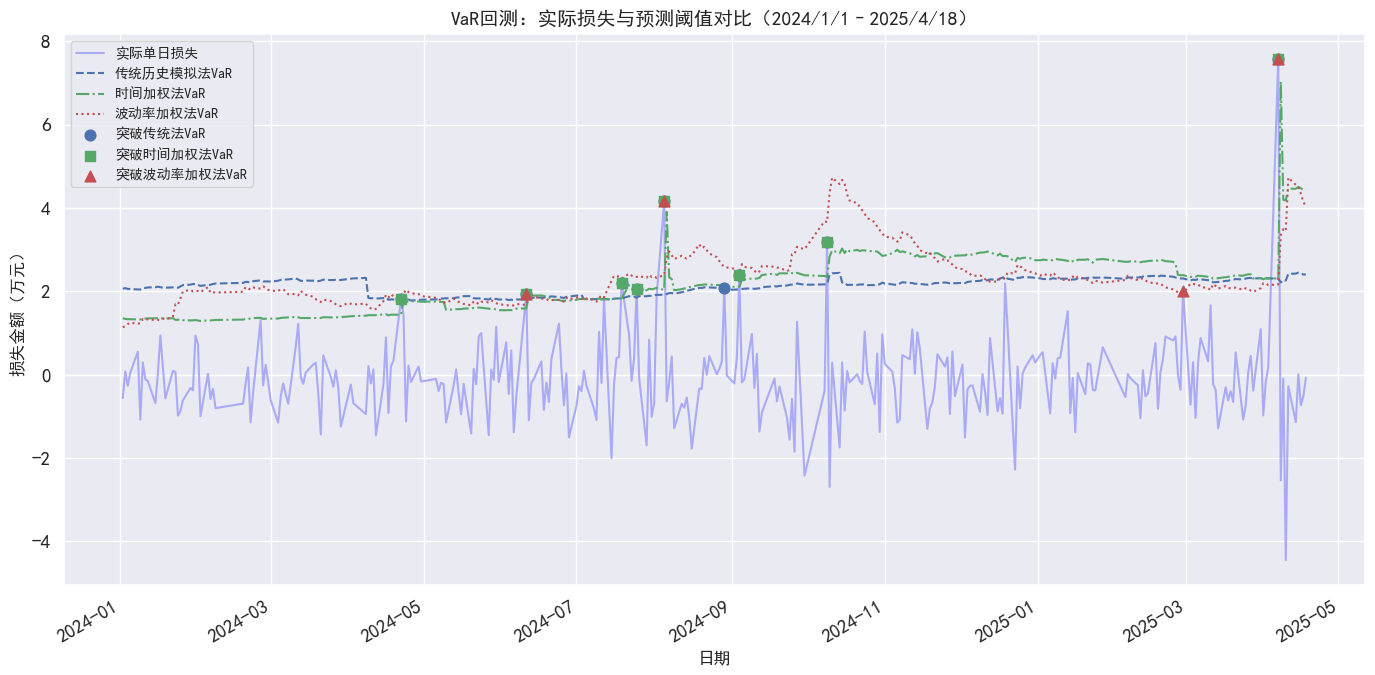

In [9]:
def plot_var_backtest(loss_df):
    """
    绘制VaR回测图，展示实际损失与三种VaR阈值对比，不同突破类型用不同标记
    :param loss_df: DataFrame，需包含以下列：
        - Loss：观察期内每日组合损失（万元）
        - Traditional VaR（传统历史模拟法VaR）
        - Time-weighted VaR（时间加权法VaR）
        - Vol-weighted VaR（波动率加权法VaR）
        索引为日期（datetime格式）
    """
    # 设置绘图风格
    sns.set_style("darkgrid")
    sns.set_theme(font='SimHei', font_scale=1.25)
    plt.figure(figsize=(14, 7))
    
    # 绘制实际损失曲线
    plt.plot(loss_df.index, loss_df['Loss'], 
             label='实际单日损失', color='#9A9AF8', alpha=0.8, lw=1.5)
    
    # 绘制三种VaR阈值线
    plt.plot(loss_df.index, loss_df['Traditional VaR'], 
             color='#4C72B0', linestyle='--', label='传统历史模拟法VaR')
    plt.plot(loss_df.index, loss_df['Time-weighted VaR'], 
             color='#55A868', linestyle='-.', label='时间加权法VaR')
    plt.plot(loss_df.index, loss_df['Vol-weighted VaR'], 
             color='#C44E52', linestyle=':', label='波动率加权法VaR')
    
    # 标记突破点（分别检测三种VaR的突破情况）
    # 生成三种突破情况的掩码
    breakthrough_traditional = loss_df[loss_df['Loss'] > loss_df['Traditional VaR']]
    breakthrough_timeweighted = loss_df[loss_df['Loss'] > loss_df['Time-weighted VaR']]
    breakthrough_volweighted = loss_df[loss_df['Loss'] > loss_df['Vol-weighted VaR']]
    
    # 用不同标记绘制三种突破
    plt.scatter(breakthrough_traditional.index, breakthrough_traditional['Loss'], 
                color='#4C72B0', marker='o', s=60, zorder=5, label='突破传统法VaR')
    plt.scatter(breakthrough_timeweighted.index, breakthrough_timeweighted['Loss'], 
                color='#55A868', marker='s', s=60, zorder=5, label='突破时间加权法VaR')
    plt.scatter(breakthrough_volweighted.index, breakthrough_volweighted['Loss'], 
                color='#C44E52', marker='^', s=60, zorder=5, label='突破波动率加权法VaR')
    
    # 图表装饰
    plt.title('VaR回测：实际损失与预测阈值对比（2024/1/1–2025/4/18）', fontsize=14)
    plt.ylabel('损失金额（万元）', fontsize=12)
    plt.xlabel('日期', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.gcf().autofmt_xdate()  # 自动旋转日期标签
    plt.tight_layout()
    plt.savefig('output/VaR回测图.svg', dpi=300)
    plt.show()

# 调用示例
loss = pd.read_excel('output/Loss.xlsx', index_col=0, parse_dates=True)
VaR = pd.read_excel('output/VaR.xlsx', index_col=0, parse_dates=True)
loss_data = pd.concat([loss, VaR], axis=1)
plot_var_backtest(loss_data)

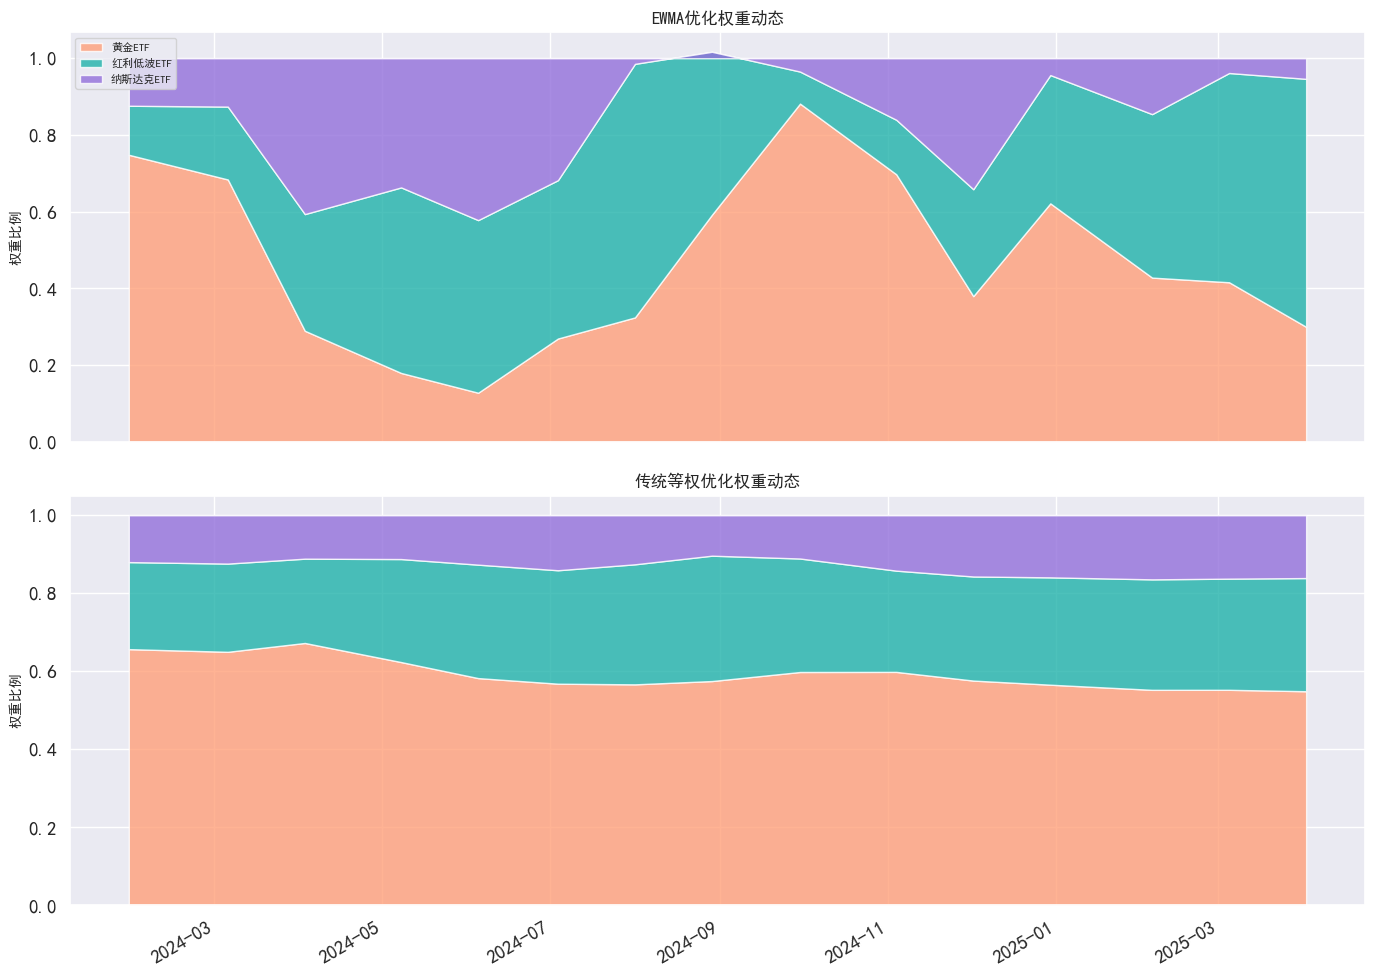

,weights
date,
2024-01-30,"[0.12476608191178763, 0.10496495823491589, 0.7..."
2024-03-06,"[0.19630587180962417, 0.298129036617429, 0.505..."
2024-04-03,"[0.2487150183134647, 0.3120391017429388, 0.439..."
2024-05-08,"[0.18273395462171088, 0.3872389840515223, 0.43..."
2024-06-05,"[0.2742545385666142, 0.3895129969849223, 0.336..."
2024-07-04,"[0.18388113336240386, 0.2791008461988382, 0.53..."
2024-08-01,"[0.09131067114327066, 0.582628332582956, 0.326..."
2024-08-29,"[0.03823183959991273, 0.4403275468933627, 0.52..."
2024-09-30,"[0.06750453143518463, 0.09911318602702149, 0.8..."


In [14]:
def plot_optimized_weights(weight_monthly, weight_quarterly):
    """
    绘制月度调仓与季度调仓的权重堆叠面积图
    :param weight_monthly: DataFrame, 月度调仓权重数据，列名为 ['黄金ETF', '红利低波ETF', '纳斯达克ETF']，索引为日期
    :param weight_quarterly: DataFrame, 季度调仓权重数据，列名同上
    """
    # 设置绘图风格
    sns.set_style("whitegrid")
    sns.set_theme(font='SimHei', font_scale=1.25)
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # 定义颜色与标签
    etf_colors = ['#FFA07A', '#20B2AA', '#9370DB']
    etf_labels = ['黄金ETF', '红利低波ETF', '纳斯达克ETF']
    
    # 绘制月度调仓权重图
    axes[0].stackplot(weight_monthly.index, 
                     weight_monthly['黄金ETF'], 
                     weight_monthly['红利低波ETF'], 
                     weight_monthly['纳斯达克ETF'],
                     labels=etf_labels, colors=etf_colors, alpha=0.8)
    axes[0].set_title('EWMA优化权重动态', fontsize=12)
    axes[0].set_ylabel('权重比例', fontsize=10)
    axes[0].legend(loc='upper left', fontsize=8)
    axes[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
    
    # 绘制季度调仓权重图
    axes[1].stackplot(weight_quarterly.index, 
                     weight_quarterly['黄金ETF'], 
                     weight_quarterly['红利低波ETF'], 
                     weight_quarterly['纳斯达克ETF'],
                     labels=etf_labels, colors=etf_colors, alpha=0.8)
    axes[1].set_title('传统等权优化权重动态', fontsize=12)
    axes[1].set_ylabel('权重比例', fontsize=10)
    axes[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
    
    # 自动旋转日期标签并调整布局
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.savefig('output/dynamic_weights.svg', dpi=300)
    plt.show()

# 调用示例
# 假设 weight_monthly 和 weight_quarterly 是优化后的权重DataFrame：
# dates_monthly = pd.date_range('2024-01-01', '2025-04-18', freq='M')
# weight_monthly = pd.DataFrame({
#     '黄金ETF': np.random.dirichlet([1,1,1], len(dates_monthly))[:,0],
#     '红利低波ETF': np.random.dirichlet([1,1,1], len(dates_monthly))[:,1],
#     '纳斯达克ETF': np.random.dirichlet([1,1,1], len(dates_monthly))[:,2]
# }, index=dates_monthly)

# dates_quarterly = pd.date_range('2024-01-01', '2025-04-18', freq='Q')
# weight_quarterly = pd.DataFrame({
#     '黄金ETF': np.random.dirichlet([1,1,1], len(dates_quarterly))[:,0],
#     '红利低波ETF': np.random.dirichlet([1,1,1], len(dates_quarterly))[:,1],
#     '纳斯达克ETF': np.random.dirichlet([1,1,1], len(dates_quarterly))[:,2]
# }, index=dates_quarterly)
import ast
asset_name = ['纳斯达克ETF', '红利低波ETF', '黄金ETF']
dcc = pd.read_excel('output/dcc_dynamic_weights.xlsx', index_col=0, parse_dates=True)
garch = pd.read_excel('output/garch_dynamic_weights.xlsx', index_col=0, parse_dates=True)
ewma = pd.read_excel('output/ewma_dynamic_weights.xlsx', index_col=0, parse_dates=True)
equal = pd.read_excel('output/equal_dynamic_weights.xlsx', index_col=0, parse_dates=True)
def get_weights(df):
    df['weights'] = df['weights'].apply(ast.literal_eval)
    df[asset_name] = df['weights'].apply(pd.Series)
    return df[asset_name]
# dcc['weights'] = dcc['weights'].apply(ast.literal_eval)
# garch['weights'] = garch['weights'].apply(ast.literal_eval)
# dcc[asset_name] = dcc['weights'].apply(pd.Series)
# garch[asset_name] = garch['weights'].apply(pd.Series)
ewma = get_weights(ewma)
equal = get_weights(equal)

plot_optimized_weights(ewma, equal)
dcc

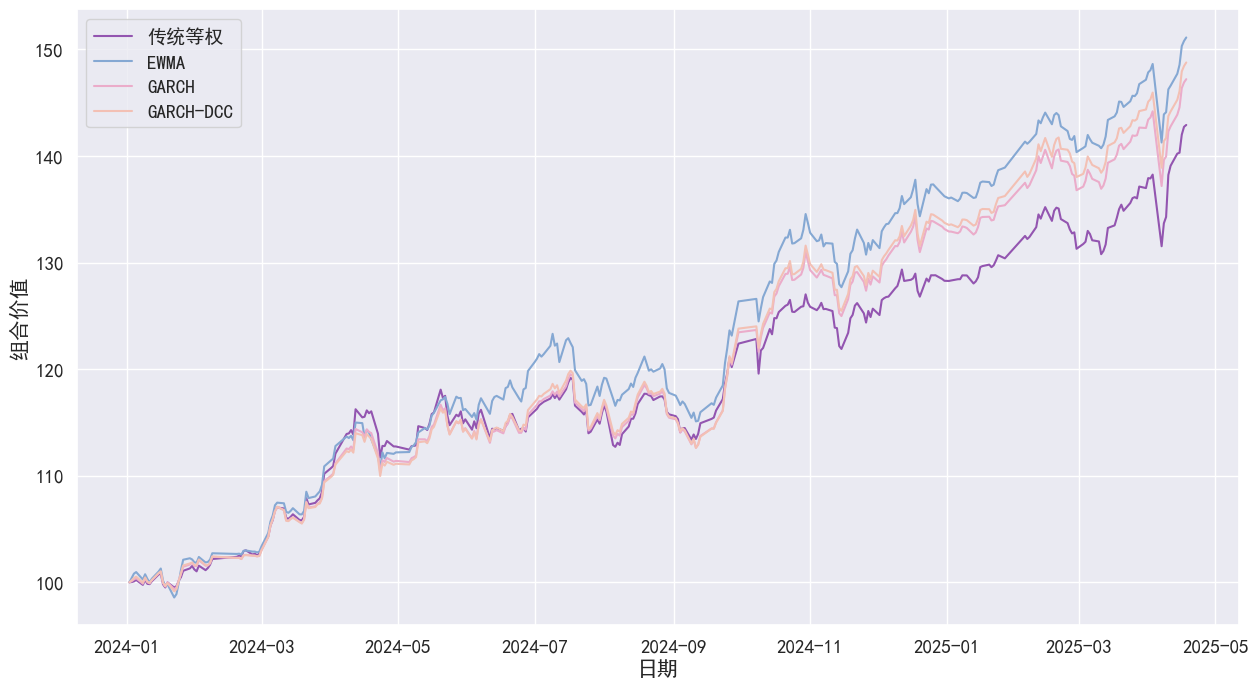

In [25]:
equal_values = pd.read_excel("output/equal_dynamic_values.xlsx", index_col=0, parse_dates=True)

ewma_values = pd.read_excel("output/ewma_dynamic_values.xlsx", index_col=0, parse_dates=True)

garch_values = pd.read_excel("output/garch_dynamic_values.xlsx", index_col=0, parse_dates=True)

dcc_values = pd.read_excel("output/dcc_dynamic_values.xlsx", index_col=0, parse_dates=True)

# plt.style.use("whitegrid")
plt.figure(figsize=(15, 8))
plt.plot(equal_values.index, equal_values.values, label="传统等权", color= "#9355B0")
plt.plot(ewma_values.index, ewma_values.values, label="EWMA", color= "#85A8D3")
plt.plot(garch_values.index, garch_values.values, label="GARCH", color= "#EBACCA")
plt.plot(dcc_values.index, dcc_values.values, label="GARCH-DCC", color= "#F3C0B4")
plt.ylabel("组合价值")
plt.xlabel("日期")
plt.legend()
plt.savefig("output/dynamic_values_comparison.svg", dpi=300)
plt.show()


In [93]:
import pandas as pd
import numpy as np


def calculate_metrics(portfolio_df):
    """
    计算投资组合绩效指标
    :param portfolio_df: DataFrame, index为时间，'value'列为组合净值
    :return: 包含年化收益、波动率、最大回撤、累计收益的字典
    """
    # 确保索引是日期时间格式
    portfolio_df.index = pd.to_datetime(portfolio_df.index)

    # 计算每日收益率
    portfolio_df['returns'] = portfolio_df['Values'].pct_change().fillna(0)

    # 计算累计收益率
    cumulative_return = (portfolio_df['Values'].iloc[-1] / portfolio_df['Values'].iloc[0]) - 1

    # 计算年化收益率
    n_years = (portfolio_df.index[-1] - portfolio_df.index[0]).days / 365.25
    annualized_return = (1 + cumulative_return) ** (1 / n_years) - 1

    # 计算年化波动率（假设252个交易日）
    annualized_volatility = portfolio_df['returns'].std() * np.sqrt(252)

    # 计算最大回撤
    portfolio_df['cum_max'] = portfolio_df['Values'].cummax()
    # print(portfolio_df['cum_max'])
    portfolio_df['drawdown'] = (portfolio_df['Values'] - portfolio_df['cum_max']) / portfolio_df['cum_max']
    max_drawdown = portfolio_df['drawdown'].min()

    return {
        'annualized_return': annualized_return*100,
        'annualized_volatility': annualized_volatility*100,
        'cumulative_return': cumulative_return*100,
        'max_drawdown': max_drawdown*100
    }


# 打印结果

dcc = pd.read_excel('output/dcc_dynamic_values.xlsx', index_col=0, parse_dates=True)
garch = pd.read_excel('output/garch_dynamic_values.xlsx', index_col=0, parse_dates=True)
ewma = pd.read_excel('output/ewma_dynamic_values.xlsx', index_col=0, parse_dates=True)
equal = pd.read_excel('output/equal_dynamic_values.xlsx', index_col=0, parse_dates=True)
fixed = pd.read_excel('output/固定权重组合价值.xlsx', index_col=0, parse_dates=True)
fixed.columns = ['Values']


print(calculate_metrics(fixed))
print(calculate_metrics(equal))
print(calculate_metrics(ewma))
print(calculate_metrics(garch))
print(calculate_metrics(dcc))
# metrics.to_excel('output/metrics.xlsx')


{'annualized_return': np.float64(23.957688050315816), 'annualized_volatility': np.float64(13.184322606447326), 'cumulative_return': np.float64(32.29869679958488), 'max_drawdown': np.float64(-8.318962088570963)}
{'annualized_return': np.float64(31.819943517245775), 'annualized_volatility': np.float64(12.053923900420099), 'cumulative_return': np.float64(42.90501576389729), 'max_drawdown': np.float64(-5.4268170555421795)}
{'annualized_return': np.float64(37.63990529097316), 'annualized_volatility': np.float64(11.881994235545887), 'cumulative_return': np.float64(51.1104734486352), 'max_drawdown': np.float64(-6.662746006406904)}
{'annualized_return': np.float64(34.87509050687147), 'annualized_volatility': np.float64(11.65845396754079), 'cumulative_return': np.float64(47.199497025236006), 'max_drawdown': np.float64(-5.775002777268572)}
{'annualized_return': np.float64(35.98259046159629), 'annualized_volatility': np.float64(11.644220162539142), 'cumulative_return': np.float64(48.7633282427208

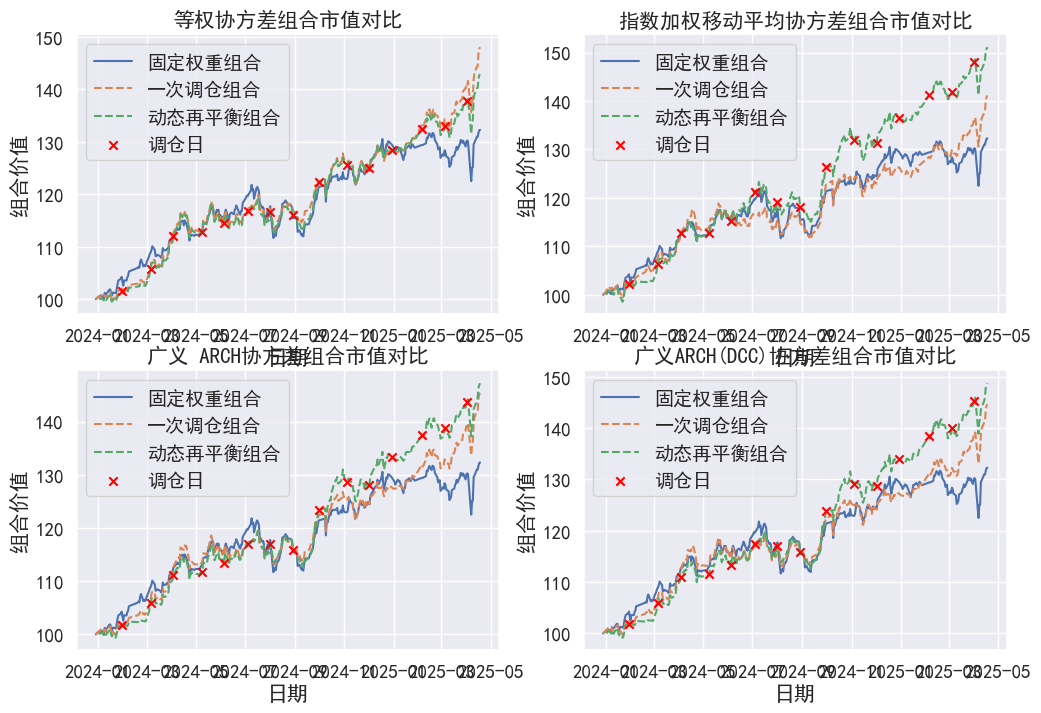

In [ ]:
cov = [
    'equal',
    'ewma',
    'garch',
    'dcc',
]
cov_str = {
    'equal': '等权协方差',
    'ewma': '指数加权移动平均协方差',
    'garch': '广义 ARCH协方差',
    'dcc': '广义ARCH(DCC)协方差'
}

portfolio_value = pd.read_excel(f'output/固定权重组合价值.xlsx', index_col=0, parse_dates=True)

def get_weights(df):
    df['weights'] = df['weights'].apply(ast.literal_eval)
    return df

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, cov_method in enumerate(cov):
    ax = axes[i // 2, i % 2]
    ax.set_title(f"{cov_str[cov_method]}组合市值对比")
# for cov_method in cov:
    port_val_rp = pd.read_excel(f'output/{cov_str[cov_method]}一次调仓组合价值.xlsx', index_col=0, parse_dates=True)
    dynamic_values = pd.read_excel(f'output/{cov_method}_dynamic_values.xlsx', index_col=0, parse_dates=True)
    rebalance_log = pd.read_excel(f'output/{cov_method}_dynamic_weights.xlsx', parse_dates=True)
    rebalance_log = get_weights(rebalance_log)
    # ax.figure(figsize=(12, 6))
    ax.plot(portfolio_value, label='固定权重组合')
    ax.plot(port_val_rp, label='一次调仓组合', linestyle='--')
    ax.plot(dynamic_values, label='动态再平衡组合', linestyle='--')
    ax.scatter(rebalance_log['date'], dynamic_values.loc[rebalance_log['date']], 
                color='red', zorder=5, label='调仓日', marker='x')
    ax.legend()
    # ax.title(f'{cov_str[cov_method]}组合市值对比')
    ax.set_ylabel('组合价值')
    ax.set_xlabel('日期')
    # ax.set_rotate_xticklabels(45)
    ax.grid(True)
    # plt.savefig(f'output/{cov_method}_dynamic_rebalancing.svg')
    # ax.show()
plt.show()